# Laboration - Skolstatistik

Vi hör mycket i media om att Sveriges PISA-resultat blir sämre och att svenska skolan tappar i kunskapsnivå. Låt oss
undersöka lite närmre hur det ser ut med hjälp av nationella prov i årskurs 9.

#### Data
Skolverket har samlat mycket statistik kring nationella proven i årskurs 9 som vi kommer att analysera vidare.

#### Uppgifter
Alla grafer ska exporteras till en undermapp som heter visualiseringar i ditt repo för labben. Exportera
matplotlib/seaborngrafer i png-format och plotly-grafer som html-filer. Ge relevanta namn till dina filer så det blir lätt att
referera till dem. Notera att du behöver ställa in bakgrundsfärg när du sparar matplotlibgrafer, annars blir de
transparenta och svåra att läsa.
Tänk på data storytelling, graferna du skapar ska ha lämpliga rubriker, labels, annoteringar, clutter ska tas bort, jobba
med attention mha färger mm.


### Uppgift 0 - uppvärmning med riket
I den här uppgiften ska du visualisera med hjälp av matplotlib och/eller seaborn
- a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena. Ändra kolumnnamnen på respektive dataframe så du får något liknande som nedan.
- b) Ta reda på antalet som fått F i matematik totalt, pojkar respektive flickor.
- c) Rita ett stapeldiagram på totala poängen för de olika ämnena.
- d) Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.

![](chart_1.png)

#### a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena. Ändra kolumnnamnen på respektive dataframe så du får något liknande som nedan.

In [22]:
import pandas as pd

# Read files and specify sheets names
df_eng = pd.read_excel('riket2023_åk9_np.xlsx', sheet_name='Engelska', skiprows=8)
df_mat = pd.read_excel('riket2023_åk9_np.xlsx', sheet_name='Matematik', skiprows=8)
df_swe = pd.read_excel('riket2023_åk9_np.xlsx', sheet_name='Svenska', skiprows=8)
df_swe_as = pd.read_excel('riket2023_åk9_np.xlsx', sheet_name='Svenska som andraspråk', skiprows=8)

# Rename columns for each DataFrame
column_names = ['Plats', 'Huvudman', 'Totalt(A-F)', 'Flickor(A-F)', 'Pojkar(A-F)',
                'Totalt(A-E)', 'Flickor(A-E)', 'Pojkar(A-E)',
                'Totalt(poäng)', 'Flickor(poäng)', 'Pojkar(poäng)']

df_eng.columns = column_names
df_mat.columns = column_names
df_swe.columns = column_names
df_swe_as.columns = column_names

# Displaying first few rows of each DataFrame to verify changes
print("Engelska:")
print(df_eng.head())
print("\nMatematik:")
print(df_mat.head())
print("\nSvenska:")
print(df_swe.head())
print("\nSvenska som andraspråk:")
print(df_swe_as.head())


Engelska:
   Plats    Huvudman  Totalt(A-F)  Flickor(A-F)  Pojkar(A-F)  Totalt(A-E)  \
0  Riket    Samtliga       106941         51864        55077         97.0   
1  Riket    Kommunal        84310         40675        43635         96.6   
2  Riket     Enskild        22582         11165        11417         98.7   
3  Riket  Skolverket           49            24           25        100.0   

   Flickor(A-E)  Pojkar(A-E)  Totalt(poäng)  Flickor(poäng)  Pojkar(poäng)  
0          97.1         97.0           15.7            15.8           15.7  
1          96.6         96.6           15.4            15.5           15.4  
2          98.8         98.7           16.9            17.0           16.8  
3         100.0        100.0           18.5            18.9           18.2  

Matematik:
   Plats    Huvudman  Totalt(A-F)  Flickor(A-F)  Pojkar(A-F) Totalt(A-E)  \
0  Riket    Samtliga       106766         51548        55218        89.1   
1  Riket    Kommunal        84163         40386        

Exporting the excel files, they can be found in the "visualiseringar" folder

In [23]:
# Export dataframes to separate Excel files, commented to avoid generating extra files
#df_eng.to_excel('engelska_grades.xlsx', index=False)
#df_mat.to_excel('matematik_grades.xlsx', index=False)
#df_swe.to_excel('svenska_grades.xlsx', index=False)
#df_swe_as.to_excel('svenska_som_andraspråk_grades.xlsx', index=False)

#### b) Ta reda på antalet som fått F i matematik totalt, pojkar respektive flickor.

In [24]:
# Filter the DataFrame to include only rows where "Huvudman" equals "Samtliga"
df_mat_samtliga = df_mat[df_mat['Huvudman'] == 'Samtliga']

# Extracting relevant columns for Mathematics
total_math_students = df_mat_samtliga['Totalt(A-F)']
girls_math_students = df_mat_samtliga['Flickor(A-F)']
boys_math_students = df_mat_samtliga['Pojkar(A-F)']

# Clean and convert percentage columns to numeric values
percentages_cleaned_total = df_mat_samtliga['Totalt(A-E)'].astype(float)
percentages_cleaned_girls = df_mat_samtliga['Flickor(A-E)'].astype(float)
percentages_cleaned_boys = df_mat_samtliga['Pojkar(A-E)'].astype(float)

# Calculate the number of students who received an 'F' grade in Mathematics
total_f_math = (total_math_students * (100 - percentages_cleaned_total) / 100).round().astype(int)
girls_f_math = (girls_math_students * (100 - percentages_cleaned_girls) / 100).round().astype(int)
boys_f_math = (boys_math_students * (100 - percentages_cleaned_boys) / 100).round().astype(int)

# Print the results
print("Total number of students who received an 'F' grade in Mathematics:", total_f_math.sum())
print("Number of boys who received an 'F' grade in Mathematics:", boys_f_math.sum())
print("Number of girls who received an 'F' grade in Mathematics:", girls_f_math.sum())



Total number of students who received an 'F' grade in Mathematics: 11637
Number of boys who received an 'F' grade in Mathematics: 5798
Number of girls who received an 'F' grade in Mathematics: 5825


##### Create Pie Chart 

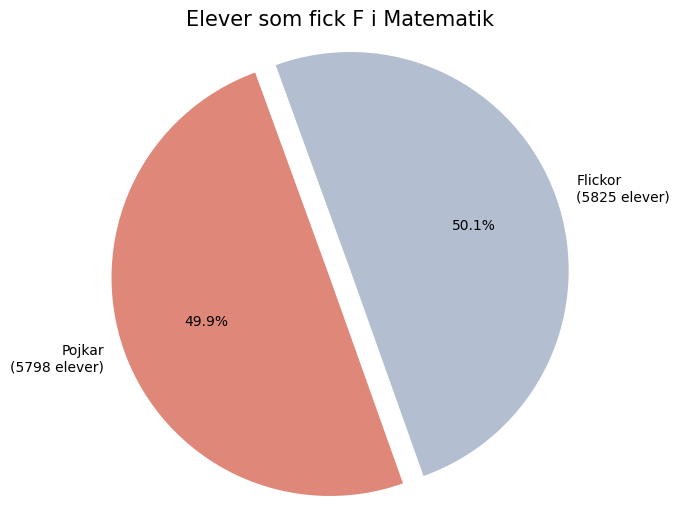

In [25]:
import matplotlib.pyplot as plt

# Total number of students
total_f_math_students = total_f_math.sum()

# By gender
total_f_math_boys = boys_f_math.sum()
total_f_math_girls = girls_f_math.sum()

# Create a pie chart
labels = [f'Pojkar\n({total_f_math_boys} elever)', f'Flickor\n({total_f_math_girls} elever)']
sizes = [total_f_math_boys, total_f_math_girls]
colors = ['#df8879', '#b3bfd1']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=110)
plt.title('Elever som fick F i Matematik', fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.margins(0.2)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Saving png file with solid background
#plt.savefig('f_math_piechart.png', bbox_inches='tight', transparent=True, pad_inches=0, facecolor=(1, 1, 1))
plt.show()



### - c) Rita ett stapeldiagram på totala poängen för de olika ämnena.

C:\Users\arthu\AppData\Local\Temp\ipykernel_23952\3818573910.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subjects, y=total_points, palette=custom_colors)


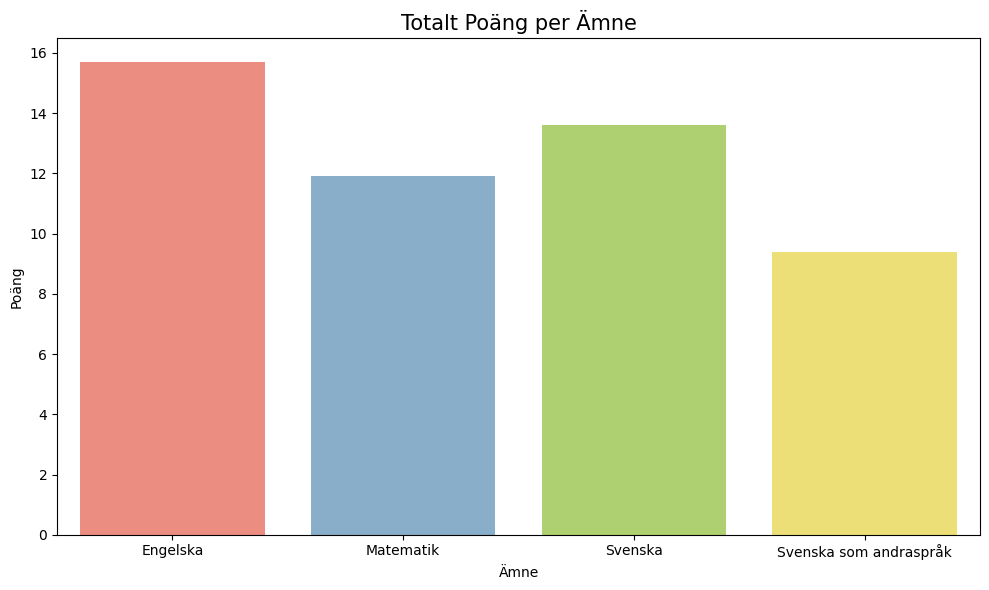

In [26]:
import seaborn as sns

# Define the data for different subjects
subjects = ['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']
total_points = [df_eng['Totalt(poäng)'].iloc[0], df_mat['Totalt(poäng)'].iloc[0], df_swe['Totalt(poäng)'].iloc[0], df_swe_as['Totalt(poäng)'].iloc[0]]

custom_colors = ['#fd7f6f', '#7eb0d5', '#b2e061', '#ffee65']

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=subjects, y=total_points, palette=custom_colors)

plt.title('Totalt Poäng per Ämne', fontsize=15)
plt.xlabel('Ämne')
plt.ylabel('Poäng')
plt.xticks(rotation=45)
plt.xticks(rotation=0)
plt.tight_layout()
#plt.savefig('points_barchart.png', bbox_inches='tight', transparent=True, pad_inches=0, facecolor=(1, 1, 1))
plt.show()

C:\Users\arthu\AppData\Local\Temp\ipykernel_23952\3480214356.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subjects, y=points, palette=custom_colors, ax=axes[i])
C:\Users\arthu\AppData\Local\Temp\ipykernel_23952\3480214356.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subjects, y=points, palette=custom_colors, ax=axes[i])
C:\Users\arthu\AppData\Local\Temp\ipykernel_23952\3480214356.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subjects, y=points, palette=custom_colors, ax=axes[i])
C:\Users\arthu\AppD

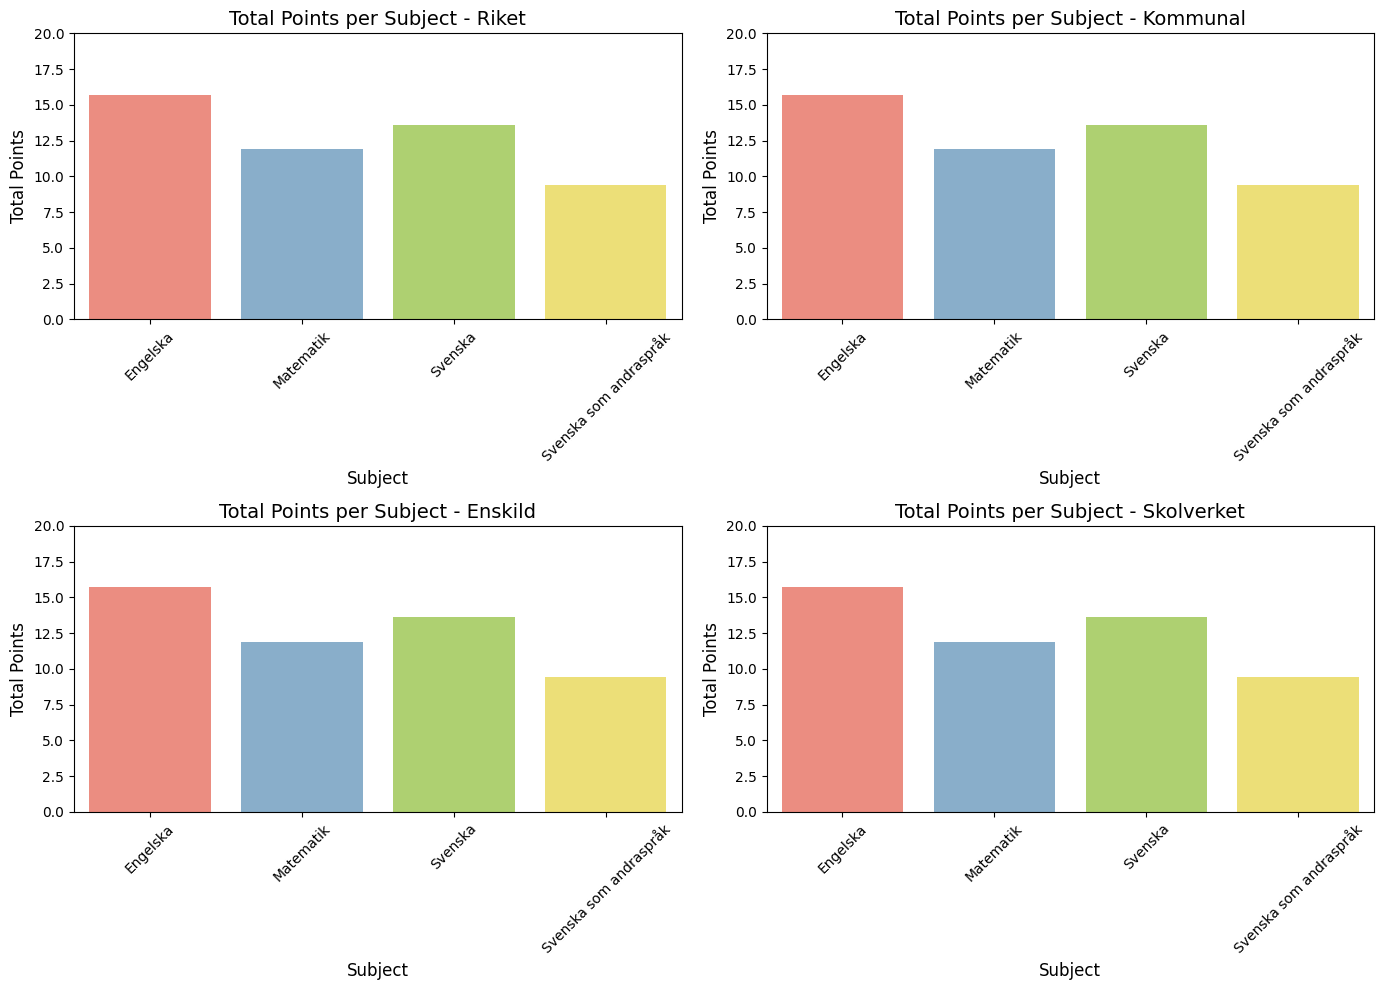

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data for different subjects
subjects = ['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']

# Filter out rows with ".." in the 'Totalt(poäng)' column
df_eng_cleaned = df_eng[df_eng['Totalt(poäng)'] != '..']
df_mat_cleaned = df_mat[df_mat['Totalt(poäng)'] != '..']
df_swe_cleaned = df_swe[df_swe['Totalt(poäng)'] != '..']
df_swe_as_cleaned = df_swe_as[df_swe_as['Totalt(poäng)'] != '..']

# Extract total points for each subject and location
total_points_per_location = {
    'Riket': [df['Totalt(poäng)'].iloc[0] for df in [df_eng_cleaned, df_mat_cleaned, df_swe_cleaned, df_swe_as_cleaned]],
    'Kommunal': [df['Totalt(poäng)'].iloc[0] for df in [df_eng_cleaned, df_mat_cleaned, df_swe_cleaned, df_swe_as_cleaned]],
    'Enskild': [df['Totalt(poäng)'].iloc[0] for df in [df_eng_cleaned, df_mat_cleaned, df_swe_cleaned, df_swe_as_cleaned]],
    'Skolverket': [df['Totalt(poäng)'].iloc[0] for df in [df_eng_cleaned, df_mat_cleaned, df_swe_cleaned, df_swe_as_cleaned]]
}

# Define custom colors for each subject
custom_colors = ['#fd7f6f', '#7eb0d5', '#b2e061', '#ffee65']

# Create subplots for each location
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate over each location to create a bar chart
for i, (location, points) in enumerate(total_points_per_location.items()):
    ax = sns.barplot(x=subjects, y=points, palette=custom_colors, ax=axes[i])
    ax.set_title(f'Total Points per Subject - {location}', fontsize=14)
    ax.set_xlabel('Subject', fontsize=12)
    ax.set_ylabel('Total Points', fontsize=12)
    ax.set_ylim(0, 20)  # Set y-axis limit from 0 to 20
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()


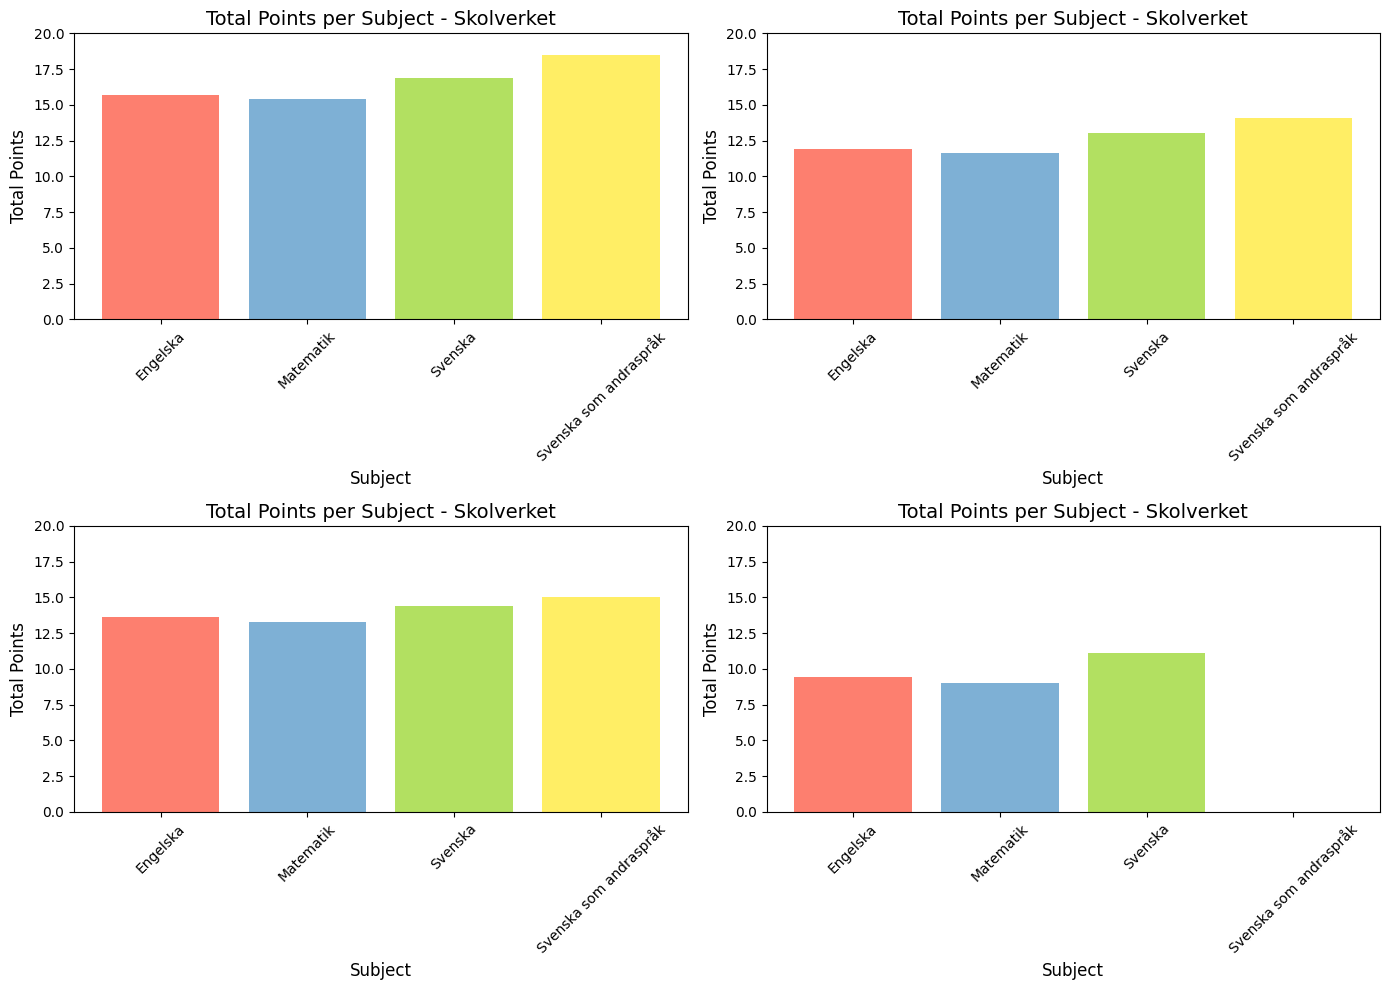

In [81]:
# Define the dataframes
dataframes = [df_eng, df_mat, df_swe, df_swe_as]

# Create subplots for each Huvudman
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate over each Huvudman to create a bar chart
for i, (df, ax) in enumerate(zip(dataframes, axes)):
    # Extract total points for each subject
    points = [row['Totalt(poäng)'] for _, row in df.iterrows()]
    
    # Convert non-numeric values to NaN
    points = [float(val) if val != '..' else float(0) for val in points]
    
    # Create the bar plot
    ax.bar(subjects, points, color=custom_colors)
    
    plt.title(f'Total Points by Subject for {huvudman}')
    ax.set_title(f'Total Points per Subject - {huvudman}', fontsize=14)
    ax.set_xlabel('Subject', fontsize=12)
    ax.set_ylabel('Total Points', fontsize=12)
    ax.set_ylim(0, 20)  # Set y-axis limit from 0 to 20
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()



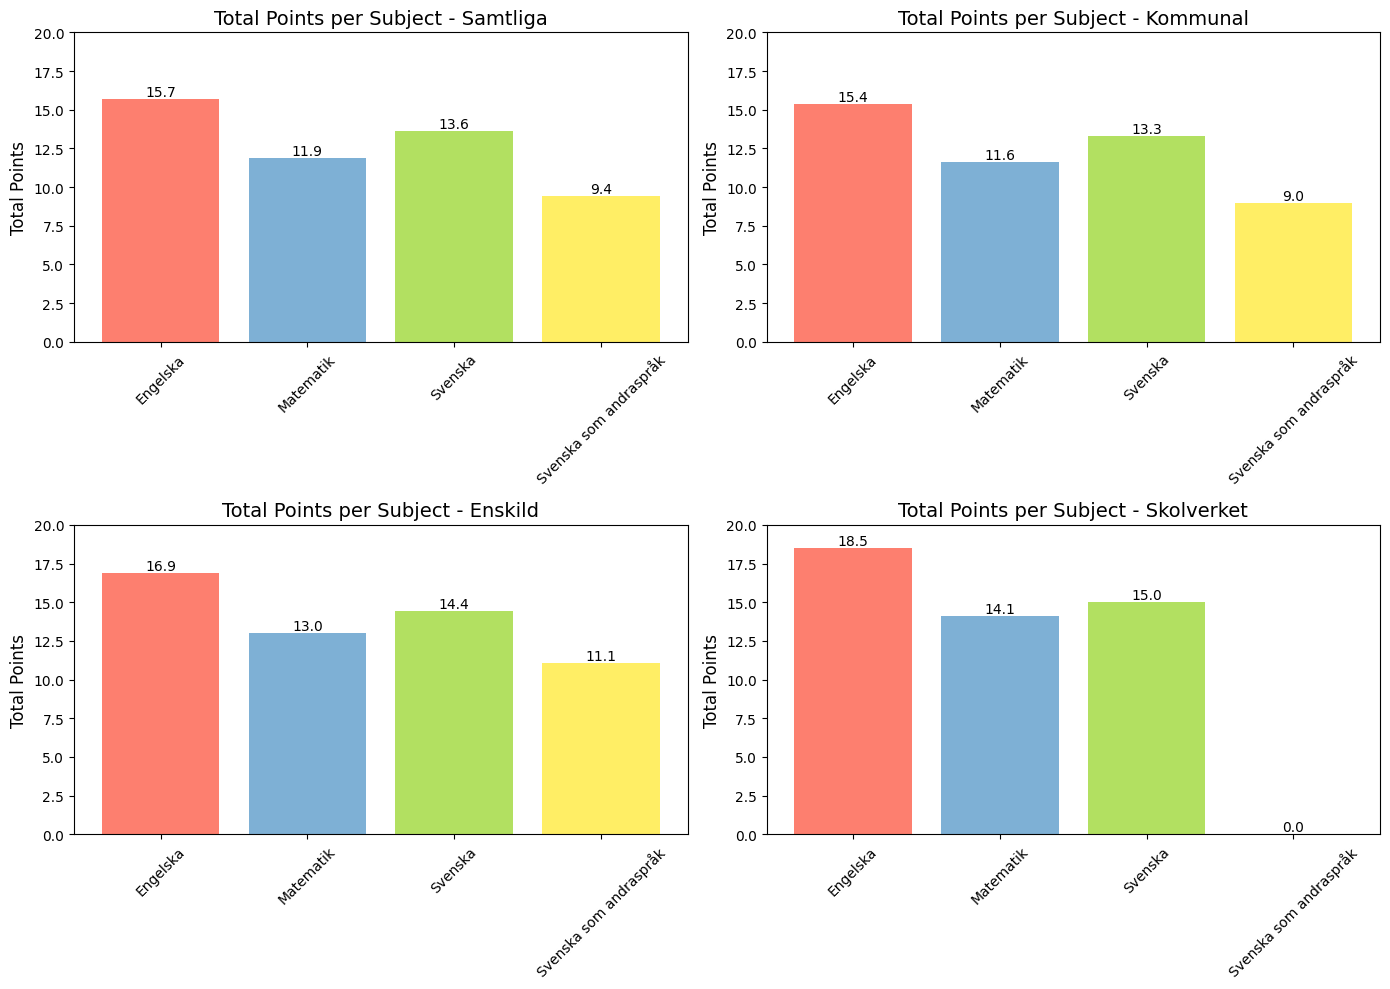

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Define Huvudman names
huvudman_names = ['Samtliga', 'Kommunal', 'Enskild', 'Skolverket']

# Define subjects and custom colors
subjects = ['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']
custom_colors = ['#fd7f6f', '#7eb0d5', '#b2e061', '#ffee65']

# Create subplots for each Huvudman
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate over each Huvudman to create a bar chart
for i, huvudman in enumerate(huvudman_names):
    # Filter data for the current Huvudman for each subject
    df_eng_huvudman = df_eng[df_eng['Huvudman'] == huvudman]
    df_mat_huvudman = df_mat[df_mat['Huvudman'] == huvudman]
    df_swe_huvudman = df_swe[df_swe['Huvudman'] == huvudman]
    df_swe_as_huvudman = df_swe_as[df_swe_as['Huvudman'] == huvudman]
    
    # Convert 'Totalt(poäng)' column to numeric, replacing non-numeric values with 0
    total_points_eng = pd.to_numeric(df_eng_huvudman['Totalt(poäng)'], errors='coerce').fillna(0).astype(float).values
    total_points_mat = pd.to_numeric(df_mat_huvudman['Totalt(poäng)'], errors='coerce').fillna(0).astype(float).values
    total_points_swe = pd.to_numeric(df_swe_huvudman['Totalt(poäng)'], errors='coerce').fillna(0).astype(float).values
    total_points_swe_as = pd.to_numeric(df_swe_as_huvudman['Totalt(poäng)'], errors='coerce').fillna(0).astype(float).values
    
    # Plot bar chart
    ax = axes[i]
    bars = ax.bar(subjects, [np.mean(total_points_eng), np.mean(total_points_mat), np.mean(total_points_swe), np.mean(total_points_swe_as)], color=custom_colors)
    ax.set_title(f'Total Points per Subject - {huvudman}', fontsize=14)
    ax.set_ylabel('Total Points', fontsize=12)
    ax.set_ylim(0, 20)  # Set y-axis limit from 0 to 20
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    
    # Add text labels parallel to the chart
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom')

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()


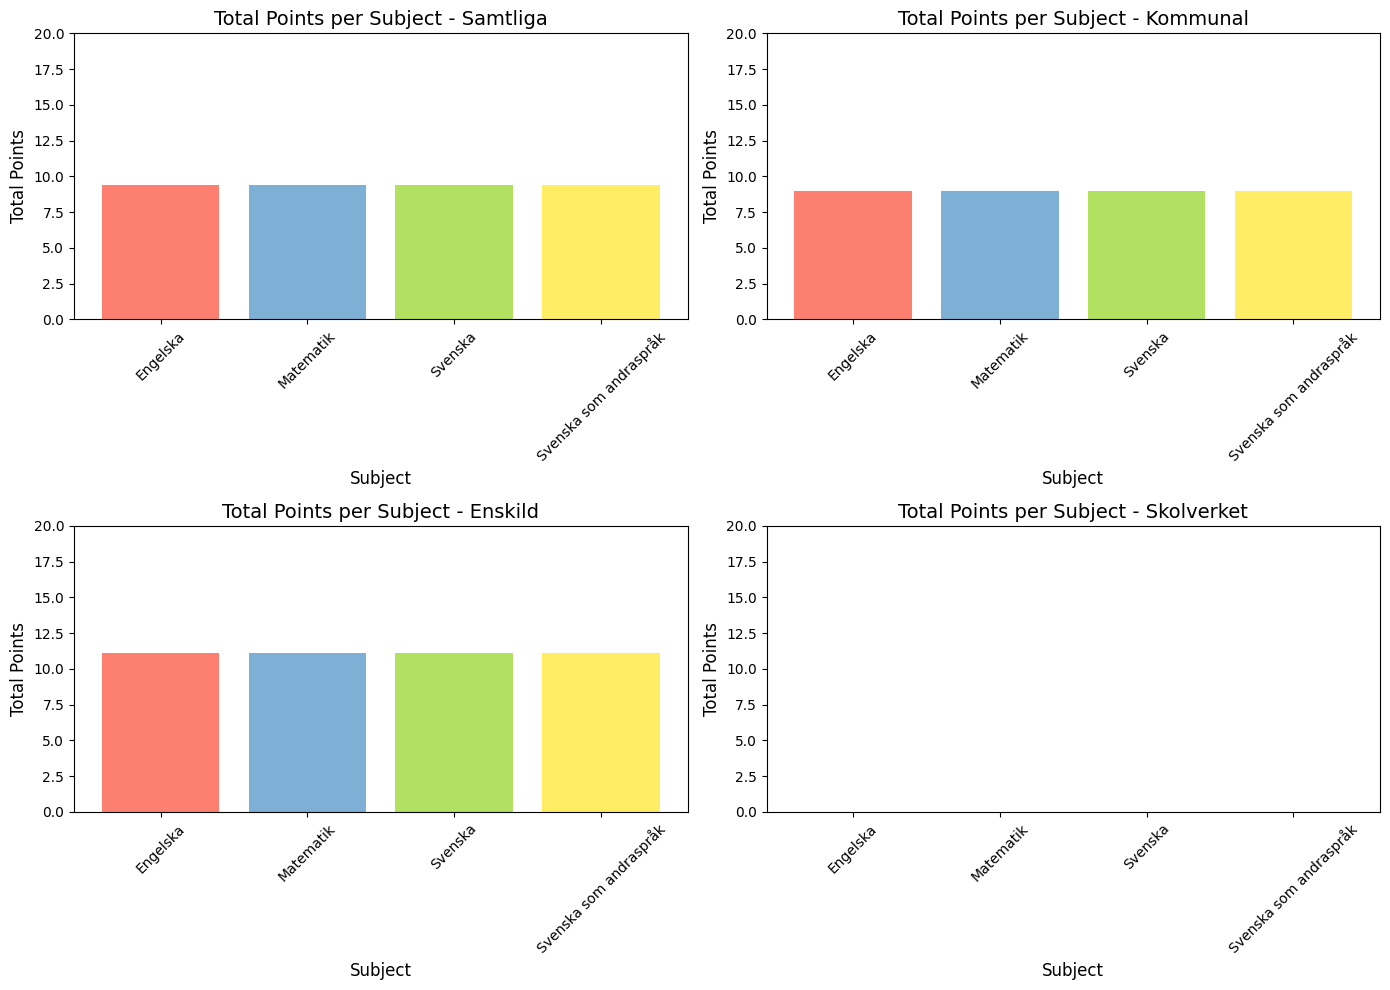

In [86]:
import matplotlib.pyplot as plt

# Define the Huvudman names
huvudman_names = ['Samtliga', 'Kommunal', 'Enskild', 'Skolverket']

# Create subplots for each Huvudman
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate over each Huvudman name to create a bar chart
for i, huvudman_name in enumerate(huvudman_names):
    # Filter data for the current Huvudman
    df_huvudman = df[df['Huvudman'] == huvudman_name]
    
    # Check if there's data available for the current Huvudman
    if not df_huvudman.empty:
        # Extract total points for each subject
        total_points = df_huvudman['Totalt(poäng)'].values
        
        # Convert points to float, replacing '..' with 0
        total_points = [float(val) if val != '..' else float(0) for val in total_points]
        
        # Plot the bar chart
        subjects = ['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']
        colors = ['#fd7f6f', '#7eb0d5', '#b2e061', '#ffee65']
        
        axes[i].bar(subjects, total_points, color=colors)
        axes[i].set_title(f'Total Points per Subject - {huvudman_name}', fontsize=14)
        axes[i].set_xlabel('Subject', fontsize=12)
        axes[i].set_ylabel('Total Points', fontsize=12)
        axes[i].set_ylim(0, 20)  # Adjust y-axis limit if needed
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    else:
        # If no data available, set the plot to be invisible
        axes[i].axis('off')

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()
